In [7]:
# notebooks/01_eda_preprocessing.ipynb

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data. This only needs to be run once.
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt')

Attempting to load dataset...


C:\Users\eep\AppData\Local\Temp\ipykernel_32848\1765412834.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/complaints.csv', encoding='utf-8')


Dataset loaded successfully.

DataFrame is not None. Proceeding with analysis and plotting.

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer dispu

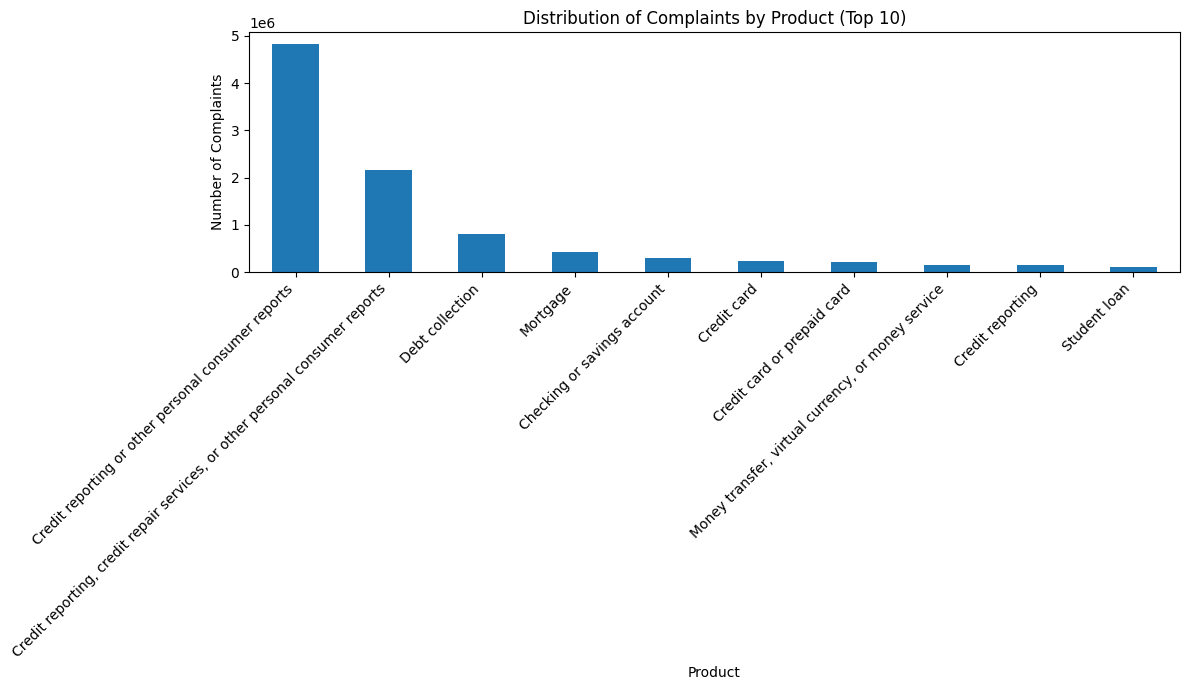

In [15]:
# --- 2. Load the dataset ---
print("Attempting to load dataset...")
try:
    df = pd.read_csv('../data/complaints.csv', encoding='utf-8')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'data/complaints.csv' was not found. Please check the file path.")
    df = None

# --- DIAGNOSTIC CHECK ---
if df is not None:
    print("\nDataFrame is not None. Proceeding with analysis and plotting.")
    print("\nInitial Data Info:")
    df.info()

    # Analyze complaint distribution by product
    print("\nTop 10 Products by Complaint Count:")
    product_counts = df['Product'].value_counts()
    print(product_counts.head(10))

    plt.figure(figsize=(12, 7))
    product_counts.head(10).plot(kind='bar')
    plt.title('Distribution of Complaints by Product (Top 10)')
    plt.xlabel('Product')
    plt.ylabel('Number of Complaints')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # --- ADD THIS CODE TO SAVE THE FIGURE ---
    import os
    output_dir = 'reports'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Save the plot to a file
    plt.savefig(os.path.join(output_dir, 'product_distribution.png'))
    print(f"Diagram successfully saved to {os.path.join(output_dir, 'product_distribution.png')}")

    # This might still not show a window in your environment, but the file should be created.
    plt.show()

else:
    print("DataFrame is None. The plotting code was skipped.")


Narrative Word Count Statistics:
count    9.609797e+06
mean     5.515649e+01
std      1.495169e+02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: narrative_word_count, dtype: float64


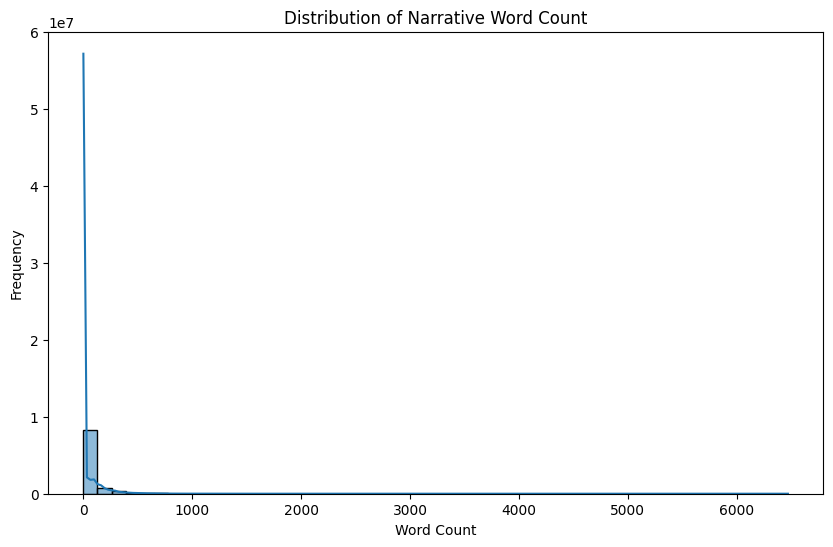


Complaints with narratives: 2980756
Complaints without narratives: 6629041


In [16]:
if df is not None:
    # Analyze narrative length
    df['narrative_word_count'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))
    print("\nNarrative Word Count Statistics:")
    print(df['narrative_word_count'].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(df['narrative_word_count'], bins=50, kde=True)
    plt.title('Distribution of Narrative Word Count')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.show()

    # Identify complaints with and without narratives
    narrative_present = df['Consumer complaint narrative'].notna().sum()
    narrative_missing = df['Consumer complaint narrative'].isna().sum()
    print(f"\nComplaints with narratives: {narrative_present}")
    print(f"Complaints without narratives: {narrative_missing}")

In [17]:
# --- 3. Data Filtering ---
if df is not None:
    print("\n--- Filtering Data ---")
    
    # Define the list of target products
    target_products = [
        'Credit card', 
        'Personal loan', 
        'Buy Now, Pay Later (BNPL)', 
        'Savings account', 
        'Money transfers'
    ]

    # Filter for target products
    filtered_df = df[df['Product'].isin(target_products)].copy()
    print(f"Dataset filtered to {len(filtered_df)} records for target products.")
    
    # Remove records with empty narratives
    filtered_df = filtered_df.dropna(subset=['Consumer complaint narrative']).copy()
    print(f"Dataset after removing empty narratives: {len(filtered_df)} records.")


--- Filtering Data ---
Dataset filtered to 232040 records for target products.
Dataset after removing empty narratives: 82164 records.


In [18]:
# --- 4. Text Cleaning ---
if 'filtered_df' in locals():
    print("\n--- Cleaning Text Narratives ---")
    
    stop_words = set(stopwords.words('english'))

    def clean_text(text):
        if not isinstance(text, str):
            return ""
        # Lowercase the text
        text = text.lower()
        # Remove special characters or boilerplate text
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'i am writing to file a complaint', '', text, flags=re.I)
        # Tokenize and remove stopwords
        tokens = text.split()
        cleaned_tokens = [word for word in tokens if word not in stop_words]
        return ' '.join(cleaned_tokens)

    filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)


--- Cleaning Text Narratives ---


In [20]:
# --- 5. Save the cleaned dataset ---
if 'filtered_df' in locals():
    output_path = '../data/filtered_complaints.csv'
    filtered_df.to_csv(output_path, index=False)
    print(f"\nCleaned and filtered dataset saved to {output_path}")


Cleaned and filtered dataset saved to ../data/filtered_complaints.csv
